# Challenge 4 - Taxi Journey outliers
> Can you find the taxi journeys that have longest and shortest duration, distance travelled and total fare? <br>
> Are there any outliers in that data? <br> 
> Can you measure/detect the outliers? <br>

investigate outliers using PCA

In [0]:
%sql
DESCRIBE taxi_journeys_sm

col_name,data_type,comment
VendorID,string,
tpep_pickup_datetime,timestamp,
tpep_dropoff_datetime,timestamp,
passenger_count,int,
trip_distance,double,
RatecodeID,string,
store_and_fwd_flag,string,
PULocationID,string,
DOLocationID,string,
payment_type,string,


In [0]:
%sql
SELECT COUNT(1) FROM taxi_journeys_sm

count(1)
20406461


In [0]:
%sql
DROP TABLE IF EXISTS taxi_journey_features_sm

In [0]:
%sql
CREATE TEMPORARY VIEW taxi_journey_features_sm AS (
  SELECT idx,
         tpep_pickup_datetime,
         tpep_dropoff_datetime,
         trip_distance,
         fare_amount,
         (UNIX_TIMESTAMP(tpep_dropoff_datetime) - UNIX_TIMESTAMP(tpep_pickup_datetime)) / 60 AS trip_duration_m,
         ROUND(trip_distance / ((UNIX_TIMESTAMP(tpep_dropoff_datetime) - UNIX_TIMESTAMP(tpep_pickup_datetime)) / (60 * 60)), 2) AS mph,
         ROUND(fare_amount / ((UNIX_TIMESTAMP(tpep_dropoff_datetime) - UNIX_TIMESTAMP(tpep_pickup_datetime)) / (60 * 60)), 2) AS dph
    FROM taxi_journeys_sm
    WHERE trip_distance > 0  --filter 0s
    AND   fare_amount > 0
    AND   UNIX_TIMESTAMP(tpep_dropoff_datetime) - UNIX_TIMESTAMP(tpep_pickup_datetime) > 0
    AND   UNIX_TIMESTAMP(tpep_dropoff_datetime) - UNIX_TIMESTAMP(tpep_pickup_datetime) < 12 * 60 * 60 -- less than 12h
    AND   trip_distance / ((UNIX_TIMESTAMP(tpep_dropoff_datetime) - UNIX_TIMESTAMP(tpep_pickup_datetime)) / (60 * 60)) < 70 -- less than 70mph
    AND   fare_amount / ((UNIX_TIMESTAMP(tpep_dropoff_datetime) - UNIX_TIMESTAMP(tpep_pickup_datetime)) / (60 * 60)) < 600 -- less than  600 dollars /h
)

In [0]:
%sql
SELECT * 
FROM   taxi_journey_features_sm
ORDER BY mph DESC

idx,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,trip_duration_m,mph,dph
56273213,2018-07-11T11:12:51.000+0000,2018-07-11T11:15:43.000+0000,3.34,11.5,2.8666666666666667,69.91,240.7
73624851,2018-09-16T01:17:34.000+0000,2018-09-16T01:18:25.000+0000,0.99,6.0,0.85,69.88,423.53
185738010,2019-12-22T20:55:38.000+0000,2019-12-22T20:56:45.000+0000,1.3,3.0,1.1166666666666667,69.85,161.19
195024821,2020-02-07T15:22:10.000+0000,2020-02-07T15:23:17.000+0000,1.3,3.0,1.1166666666666667,69.85,161.19
114584369,2019-02-16T23:44:24.000+0000,2019-02-17T00:00:00.000+0000,18.16,52.0,15.6,69.85,200.0
89241568,2018-11-10T14:24:17.000+0000,2018-11-10T14:25:24.000+0000,1.3,3.0,1.1166666666666667,69.85,161.19
202679710,2020-03-17T13:05:00.000+0000,2020-03-17T13:13:00.000+0000,9.31,8.0,8.0,69.83,60.0
145490921,2019-06-23T01:36:50.000+0000,2019-06-23T02:46:44.000+0000,81.27,150.0,69.9,69.76,128.76
185609874,2019-12-22T06:36:46.000+0000,2019-12-22T06:43:29.000+0000,7.8,52.0,6.716666666666667,69.68,464.52
94977079,2018-12-02T02:34:13.000+0000,2018-12-02T02:35:15.000+0000,1.2,3.0,1.0333333333333334,69.68,174.19


In [0]:
%sql
SELECT * 
FROM   taxi_journey_features_sm
ORDER BY dph DESC

idx,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,trip_duration_m,mph,dph
158514613,2019-08-25T21:13:56.000+0000,2019-08-25T21:16:02.000+0000,0.37,21.0,2.1,10.57,600.0
186794169,2019-12-29T16:30:16.000+0000,2019-12-29T16:32:22.000+0000,0.01,21.0,2.1,0.29,600.0
190681259,2020-01-18T04:27:35.000+0000,2020-01-18T04:29:41.000+0000,0.01,21.0,2.1,0.29,600.0
3717399,2018-01-14T23:39:49.000+0000,2018-01-14T23:41:55.000+0000,0.08,21.0,2.1,2.29,600.0
156633974,2019-08-16T06:11:45.000+0000,2019-08-16T06:13:51.000+0000,0.33,21.0,2.1,9.43,600.0
102185781,2018-12-29T00:01:07.000+0000,2018-12-29T00:30:08.000+0000,13.45,290.0,29.016666666666666,27.81,599.66
185725683,2019-12-22T19:28:49.000+0000,2019-12-22T19:35:25.000+0000,3.23,65.92,6.6,29.36,599.27
52130168,2018-06-24T16:54:59.000+0000,2018-06-24T17:03:00.000+0000,1.58,80.0,8.016666666666667,11.83,598.75
203336968,2020-05-17T21:56:36.000+0000,2020-05-17T22:04:07.000+0000,4.46,75.0,7.516666666666667,35.6,598.67
200051587,2020-03-01T18:40:20.000+0000,2020-03-01T18:47:21.000+0000,3.6,70.0,7.016666666666667,30.78,598.57


In [0]:
taxi_journey_pd = spark.sql('SELECT * FROM taxi_journey_features_sm').toPandas()
taxi_journey_pd.head()

Out[1]:

,idx,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,trip_duration_m,mph,dph
0,30477053,2018-04-13 15:37:51,2018-04-13 15:39:51,0.46,3.5,2.000000,13.80,105.00
1,30477055,2018-04-13 15:37:51,2018-04-13 15:40:39,0.10,3.5,2.800000,2.14,75.00
2,30477063,2018-04-13 15:37:53,2018-04-13 15:45:25,1.22,7.0,7.533333,9.72,55.75
3,30477071,2018-04-13 15:37:55,2018-04-13 15:52:24,1.51,10.5,14.483333,6.26,43.50
4,30477075,2018-04-13 15:37:57,2018-04-13 15:57:29,2.40,14.0,19.533333,7.37,43.00


PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import figure
feature_cols = ['trip_distance', 'trip_duration_m', 'fare_amount', 'mph', 'dph']
taxi_pca = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(taxi_journey_pd[feature_cols]))

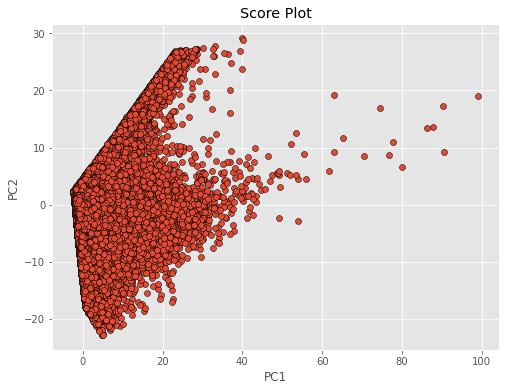

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))  
with plt.style.context(('ggplot')):      
  plt.scatter(taxi_pca[:, 0], taxi_pca[:, 1], edgecolors='k', cmap='jet')      
  plt.xlabel('PC1')      
  plt.ylabel('PC2')      
  plt.title('Score Plot')  
  plt.show()

In [0]:
import pandas as pd
taxi_journey_pd['pc1'] = pd.Series(taxi_pca[:, 0])
taxi_journey_pd['pc2'] = pd.Series(taxi_pca[:, 1])
taxi_journey_pd.sort_values('pc1', ascending=False).head(10)

Out[4]:

,idx,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,trip_duration_m,mph,dph,pc1,pc2
20051835,203323549,2020-05-16 12:19:05,2020-05-16 18:54:20,305.10,801.5,395.250000,46.31,121.67,99.131785,19.023340
3834055,10191393,2018-02-05 17:00:35,2018-02-05 20:47:10,204.81,1020.5,226.583333,54.23,270.23,90.497633,9.148927
16012137,196054551,2020-02-12 11:36:07,2020-02-12 17:43:11,274.50,735.5,367.066667,44.87,120.22,90.303645,17.264970
5842271,60659801,2018-07-27 15:53:03,2018-07-27 20:33:46,196.65,974.5,280.716667,42.03,208.29,87.847508,13.566897
20113279,203964116,2020-06-26 19:11:41,2020-06-27 00:15:01,270.32,699.5,303.333333,53.47,138.36,86.318873,13.332927
1974815,116186243,2019-02-23 20:16:04,2019-02-23 23:42:40,226.10,750.0,206.600000,65.66,217.81,80.095466,6.516311
15200329,187780058,2020-01-04 12:52:02,2020-01-04 17:23:52,259.22,575.0,271.833333,57.22,126.92,77.643886,10.883799
19662230,199350105,2020-02-27 18:59:56,2020-02-27 22:46:57,206.60,740.0,227.016667,54.60,195.58,76.633070,8.621658
20040527,203205535,2020-05-06 11:11:26,2020-05-06 17:22:58,219.30,588.0,371.533333,35.42,94.96,74.375669,17.003610
16472219,183869122,2019-12-15 10:44:46,2019-12-15 14:45:38,248.60,475.0,240.866667,61.93,118.32,70.340221,8.554423


In [0]:
taxi_journey_pd.sort_values('pc2', ascending=True).head(10)

Out[5]:

,idx,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,trip_duration_m,mph,dph,pc1,pc2
18588753,137884160,2019-05-21 08:47:38,2019-05-21 08:48:16,0.70,6.0,0.633333,66.32,568.42,4.983615,-22.818621
271673,33220439,2018-04-21 23:47:27,2018-04-21 23:47:43,0.30,2.5,0.266667,67.50,562.50,4.787987,-22.760249
7005358,90304881,2018-11-14 11:28:41,2018-11-14 11:28:57,0.30,2.5,0.266667,67.50,562.50,4.787987,-22.760249
15450085,190325924,2020-01-16 18:00:11,2020-01-16 18:00:53,0.80,6.5,0.700000,68.57,557.14,5.116927,-22.594865
15399940,189813331,2020-01-14 12:25:02,2020-01-14 12:25:44,0.76,6.5,0.700000,65.14,557.14,4.885650,-22.320982
19988110,202661057,2020-03-17 06:42:35,2020-03-17 06:42:54,0.30,3.0,0.316667,56.84,568.42,4.143249,-22.108152
6740028,87612746,2018-11-04 19:31:27,2018-11-04 19:35:37,4.12,40.0,4.166667,59.33,576.00,6.860170,-21.999164
17969579,120225678,2019-03-11 16:59:04,2019-03-11 17:00:07,1.10,9.7,1.050000,62.86,554.29,4.941195,-21.988681
14931599,162545606,2019-09-14 14:05:38,2019-09-14 14:05:57,0.29,3.0,0.316667,54.95,568.42,4.017574,-21.957149
3484312,6659019,2018-01-25 06:28:47,2018-01-25 06:29:06,0.29,3.0,0.316667,54.95,568.42,4.017574,-21.957149


In [0]:
taxi_journey_pd.sort_values('dph', ascending=False).head(10)

Out[6]:

,idx,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,trip_duration_m,mph,dph,pc1,pc2
11527329,3717399,2018-01-14 23:39:49,2018-01-14 23:41:55,0.08,21.00,2.100000,2.29,600.00,1.631635,-18.592850
16759247,186794169,2019-12-29 16:30:16,2019-12-29 16:32:22,0.01,21.00,2.100000,0.29,600.00,1.489943,-18.433492
13233940,156633974,2019-08-16 06:11:45,2019-08-16 06:13:51,0.33,21.00,2.100000,9.43,600.00,2.137491,-19.161757
15484943,190681259,2020-01-18 04:27:35,2020-01-18 04:29:41,0.01,21.00,2.100000,0.29,600.00,1.489943,-18.433492
13418045,158514613,2019-08-25 21:13:56,2019-08-25 21:16:02,0.37,21.00,2.100000,10.57,600.00,2.218271,-19.252591
5220208,102185781,2018-12-29 00:01:07,2018-12-29 00:30:08,13.45,290.00,29.016667,27.81,599.66,19.448146,-16.593398
16654504,185725683,2019-12-22 19:28:49,2019-12-22 19:35:25,3.23,65.92,6.600000,29.36,599.27,6.236957,-20.051697
9743899,52130168,2018-06-24 16:54:59,2018-06-24 17:03:00,1.58,80.00,8.016667,11.83,598.75,5.583246,-18.438311
20053180,203336968,2020-05-17 21:56:36,2020-05-17 22:04:07,4.46,75.00,7.516667,35.60,598.67,7.303243,-20.387572
19731220,200051587,2020-03-01 18:40:20,2020-03-01 18:47:21,3.60,70.00,7.016667,30.78,598.57,6.596401,-20.078098


In [0]:
taxi_journey_pd.sort_values('mph', ascending=False).head(10)

Out[7]:

,idx,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,trip_duration_m,mph,dph,pc1,pc2
8370528,56273213,2018-07-11 11:12:51,2018-07-11 11:15:43,3.34,11.5,2.866667,69.91,240.70,4.324358,-11.472312
7727421,73624851,2018-09-16 01:17:34,2018-09-16 01:18:25,0.99,6.0,0.850000,69.88,423.53,4.546427,-18.019872
15911113,195024821,2020-02-07 15:22:10,2020-02-07 15:23:17,1.30,3.0,1.116667,69.85,161.19,3.145770,-8.852985
16655720,185738010,2019-12-22 20:55:38,2019-12-22 20:56:45,1.30,3.0,1.116667,69.85,161.19,3.145770,-8.852985
1816597,114584369,2019-02-16 23:44:24,2019-02-17 00:00:00,18.16,52.0,15.600000,69.85,200.00,8.731363,-9.046074
6900509,89241568,2018-11-10 14:24:17,2018-11-10 14:25:24,1.30,3.0,1.116667,69.85,161.19,3.145770,-8.852985
19989924,202679710,2020-03-17 13:05:00,2020-03-17 13:13:00,9.31,8.0,8.000000,69.83,60.00,4.303689,-4.958463
17672763,145490921,2019-06-23 01:36:50,2019-06-23 02:46:44,81.27,150.0,69.900000,69.76,128.76,24.357834,-3.132858
2744967,174760455,2019-11-06 17:18:25,2019-11-06 17:18:56,0.60,2.5,0.516667,69.68,290.32,3.629067,-13.392500
15143427,164698629,2019-09-24 00:07:35,2019-09-24 00:08:37,1.20,8.0,1.033333,69.68,464.52,4.872955,-19.409108
